<a href="https://colab.research.google.com/github/Kulpreet-prog/NIELIT-FSK-PRIME-April21/blob/main/copy_of_task_6__introduction_to_video_processing_using_opencv_ai_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 6: Introduction to Video Processing with OpenCV

## Section 1: Setup and Video Loading

### **Task 1**: Load and Display Video
*Instruction*: Load a video file (`sample_video.mp4`) and display it frame-by-frame using OpenCV.

In [ ]:
from google.colab import files

uploaded = files.upload()

import cv2
from google.colab.patches import cv2_imshow

# Open the uploaded video
cap = cv2.VideoCapture('sample_video.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Show the frame
    cv2_imshow(frame)

    # Wait for a short period
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Saving sample_video (2).mp4 to sample_video (2).mp4


## Section 2: Convert Frames to Grayscale

### **Task 2**: Display Grayscale Video Frames

*Instruction*: Convert each frame to grayscale before displaying.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Open the uploaded video
cap = cv2.VideoCapture('sample_video.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Show the frame
    cv2_imshow(frame)

    # Small delay between frames
    cv2.waitKey(1)

cap.release()


## Section 3: Save Processed Video

### **Task 3**: Save Grayscale Video to File

*Instruction*: Save the grayscale video to disk as `output_gray.avi`.


In [ ]:


# Open the uploaded video
cap = cv2.VideoCapture('sample_video.mp4')

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output_gray.avi',
                      cv2.VideoWriter_fourcc(*'XVID'),
                      fps,
                      (frame_width, frame_height),
                      isColor=False)

# Read and write frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Write the grayscale frame
    out.write(gray)

    # (Optional) Show the frame
    # from google.colab.patches import cv2_imshow
    # cv2_imshow(gray)

cap.release()
out.release()

print("✅ Grayscale video saved as 'output_gray.avi'!")


✅ Grayscale video saved as 'output_gray.avi'!


## Section 4: Real-Time Webcam Feed

### **Task 4**: Capture and Display Webcam Feed

*Instruction*: Access the webcam and display the live video feed. Press `q` to quit.

In [ ]:
import cv2

# Open the webcam (0 is usually the default webcam)
cap = cv2.VideoCapture(0)

# Check if the webcam is opened
if not cap.isOpened():
    print("❌ Error: Could not open webcam.")
else:
    print("✅ Webcam opened successfully!")

# Capture frame-by-frame
while True:
    ret, frame = cap.read()

    if not ret:
        print("❌ Failed to grab frame.")
        break

    # Display the resulting frame
    cv2.imshow('Webcam Live Feed', frame)

    # Press 'q' key to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("👋 'q' pressed. Exiting...")
        break

# Release everything when job is finished
cap.release()
cv2.destroyAllWindows()


❌ Error: Could not open webcam.
❌ Failed to grab frame.


## Section 5: Add Live Effects to Webcam Feed

### **Task 5**:  Apply Canny Edge Detection in Real-Time

*Instruction*: While capturing from webcam, apply Canny edge detection to each frame and display side-by-side.


In [ ]:
import cv2
import numpy as np

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Error: Could not open webcam.")
else:
    print("✅ Webcam opened successfully!")

while True:
    ret, frame = cap.read()

    if not ret:
        print("❌ Failed to grab frame.")
        break

    # Apply Canny Edge Detection
    edges = cv2.Canny(frame, 100, 200)

    # Convert edges to 3 channels (so we can stack with original)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Stack original and edges side by side
    combined = np.hstack((frame, edges_colored))

    # Display the combined frame
    cv2.imshow('Original and Canny Edge Detection', combined)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("👋 'q' pressed. Exiting...")
        break

# Release everything
cap.release()
cv2.destroyAllWindows()


❌ Error: Could not open webcam.
❌ Failed to grab frame.


## Section 6: Color Spaces and Histogram

### **Task 6**: Convert Color Spaces and Plot Histogram

*Instruction*: Convert the image to grayscale and HSV. Then plot a histogram of grayscale values.

Saving sample.jpg to sample.jpg
✅ Image 'sample.jpg' loaded successfully!


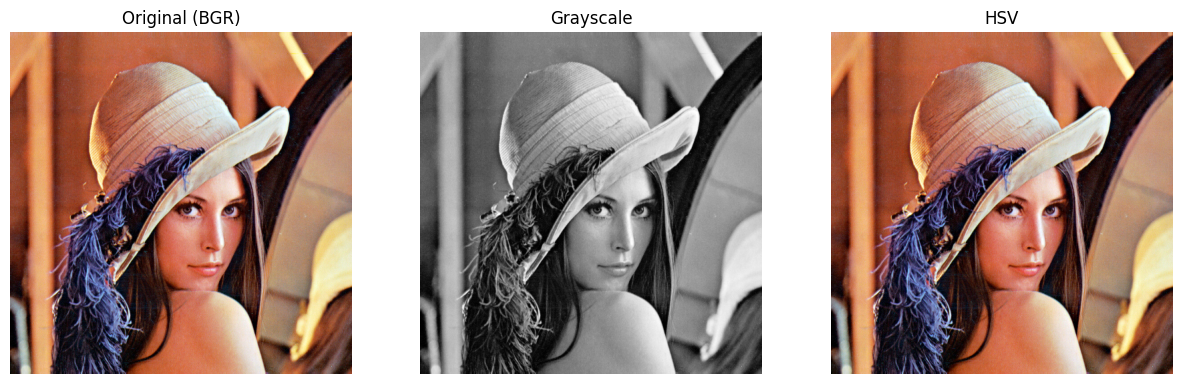

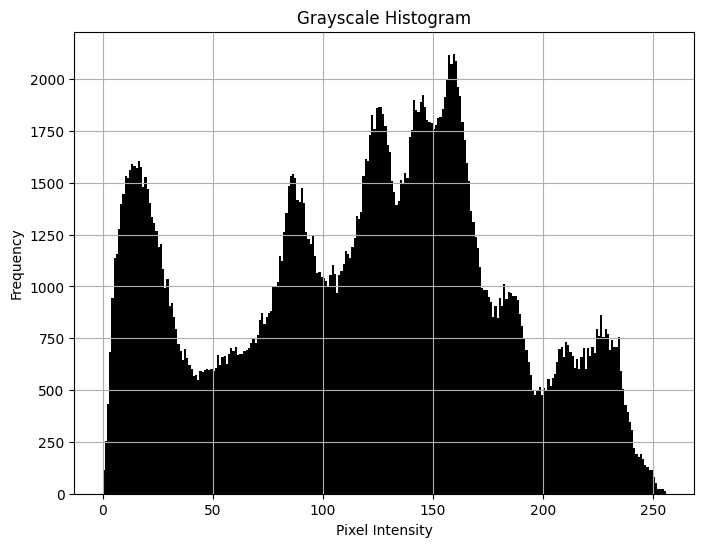

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()

# Get uploaded file name
filename = list(uploaded.keys())[0]  # Get the first uploaded file name

# Read the uploaded image
image = cv2.imread(filename)

if image is None:
    print("❌ Error: Image not loaded. Check the file name.")
else:
    print(f"✅ Image '{filename}' loaded successfully!")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Display the images
    plt.figure(figsize=(15,5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.title('Original (BGR)')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Grayscale Image
    plt.subplot(1, 3, 2)
    plt.title('Grayscale')
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

    # HSV Image
    plt.subplot(1, 3, 3)
    plt.title('HSV')
    plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
    plt.axis('off')

    plt.show()

    # Plot grayscale histogram
    plt.figure(figsize=(8,6))
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.hist(gray.ravel(), bins=256, range=(0, 256), color='black')
    plt.grid(True)
    plt.show()
